In [3]:
print("hi")

hi


In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.gridworld import GridworldEnv

In [5]:
env = GridworldEnv()

In [6]:
def policy_eval(policy, env, discount_factor=1.0, theta=0.00001):
    """
    Evaluate a policy given an environment and a full description of the environment's dynamics.
    
    Args:
        policy: [S, A] shaped matrix representing the policy.
        env: OpenAI env. env.P represents the transition probabilities of the environment.
            env.P[s][a] is a list of transition tuples (prob, next_state, reward, done).
            env.nS is a number of states in the environment. 
            env.nA is a number of actions in the environment.
        theta: We stop evaluation once our value function change is less than theta for all states.
        discount_factor: Gamma discount factor.
    
    Returns:
        Vector of length env.nS representing the value function.
    """
    # Start with a random (all 0) value function
    V = np.zeros(env.nS)
    while True:
        delta = 0
        # ——— iterate over all states ———
        for s in range(env.nS):
            v = 0
            # sum over actions
            for a in range(env.nA):
                action_prob = policy[s, a]
                for (p, next_s, r, done) in env.P[s][a]:
                    v += action_prob * p * (r + discount_factor * V[next_s])
            # track biggest change for this sweep
            delta = max(delta, abs(v - V[s]))
            V[s] = v
        # ——— after finishing all states, check for convergence ———
        if delta < theta:
            break
    return np.array(V)

In [7]:
random_policy = np.ones([env.nS, env.nA]) / env.nA
v = policy_eval(random_policy, env)

In [8]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0])
np.testing.assert_array_almost_equal(v, expected_v, decimal=2)

In [9]:
print("Computed V:")
print(v.reshape(4,4))
print("Expected V:")
print(expected_v.reshape(4,4))
print("Max abs error:", np.max(np.abs(v - expected_v)))

Computed V:
[[  0.         -13.99993529 -19.99990698 -21.99989761]
 [-13.99993529 -17.9999206  -19.99991379 -19.99991477]
 [-19.99990698 -19.99991379 -17.99992725 -13.99994569]
 [-21.99989761 -19.99991477 -13.99994569   0.        ]]
Expected V:
[[  0 -14 -20 -22]
 [-14 -18 -20 -20]
 [-20 -20 -18 -14]
 [-22 -20 -14   0]]
Max abs error: 0.00010239003918854905


In [10]:
# Test: Make sure the evaluated policy is what we expected
expected_v = np.array([  0, -14, -20, -22,
                        -14, -18, -20, -20,
                        -20, -20, -18, -14,
                        -22, -20, -14,   0])
if np.allclose(v, expected_v, atol=1e-2):
    print("Yes")
else:
    print("No")

Yes


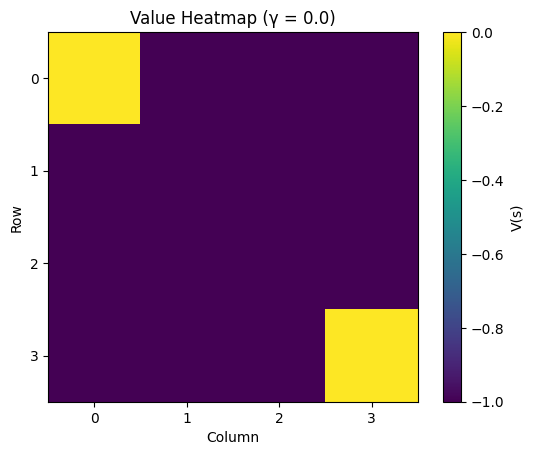

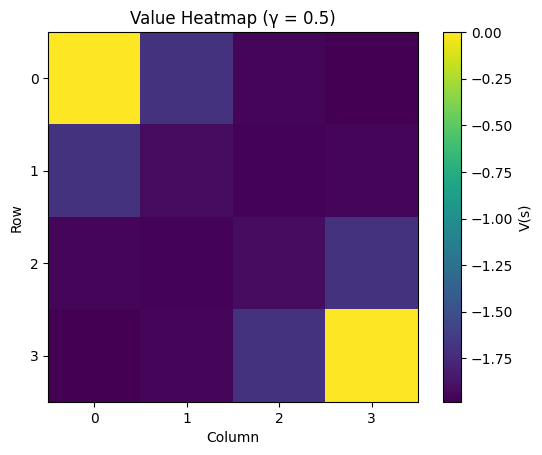

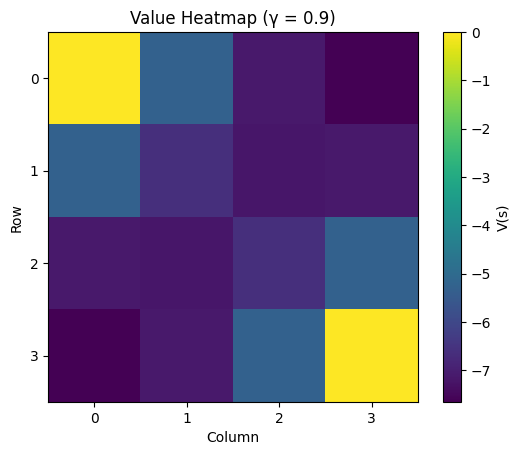

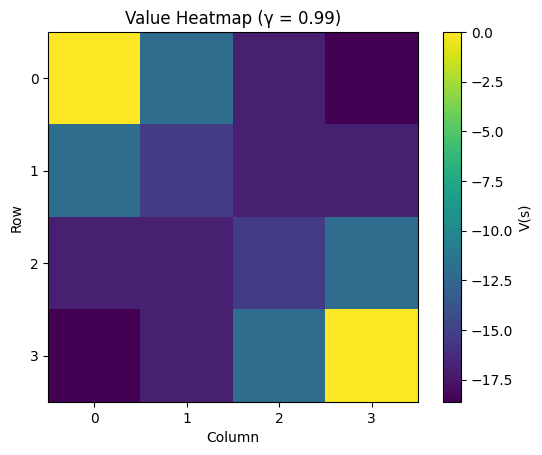

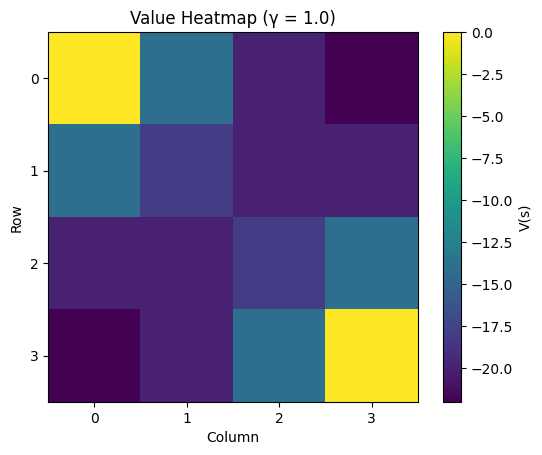

In [9]:
gammas = [0.0, 0.5, 0.9, 0.99, 1.0]

for gamma in gammas:
    V = policy_eval(random_policy, env, discount_factor = gamma, theta = 0.0001)
    grid = V.reshape((4, 4))

    plt.figure()
    plt.imshow(grid, origin='upper')        # default colormap
    plt.title(f"Value Heatmap (γ = {gamma})")
    plt.colorbar(label='V(s)')
    plt.xticks(range(4))
    plt.yticks(range(4))
    plt.xlabel('Column')
    plt.ylabel('Row')
    plt.show()